# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

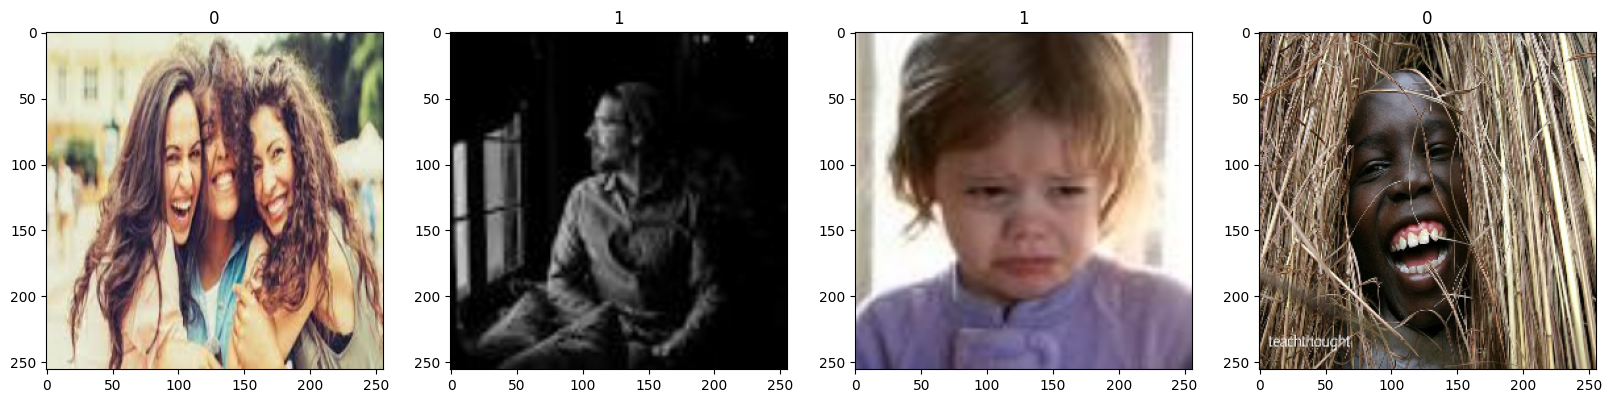

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.74524355, 0.60798866, 0.45896906],
          [0.74945617, 0.6122013 , 0.46318167],
          [0.7536688 , 0.6164139 , 0.4673943 ],
          ...,
          [0.43747702, 0.3668888 , 0.3276731 ],
          [0.43529412, 0.3647059 , 0.3254902 ],
          [0.43529412, 0.3647059 , 0.3254902 ]],
 
         [[0.73393935, 0.59668446, 0.44766486],
          [0.7359911 , 0.5987362 , 0.4497166 ],
          [0.74020374, 0.60294884, 0.45392922],
          ...,
          [0.4393048 , 0.36871654, 0.32950085],
          [0.4375383 , 0.36695006, 0.32773438],
          [0.4375383 , 0.36695006, 0.32773438]],
 
         [[0.71760875, 0.58035386, 0.42908242],
          [0.7181707 , 0.5809158 , 0.42964435],
          [0.7233839 , 0.586129  , 0.43485755],
          ...,
          [0.44067097, 0.3700827 , 0.33086702],
          [0.4392157 , 0.36862746, 0.32941177],
          [0.4392157 , 0.36862746, 0.32941177]],
 
         ...,
 
         [[0.82480085, 0.805193  , 0.7934283 ],
          [0.82901

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 499ms/step - loss: 0.7986 - accuracy: 0.5580 - val_loss: 0.6915 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 5s 462ms/step - loss: 0.6497 - accuracy: 0.6250 - val_loss: 0.5923 - val_accuracy: 0.7500
Epoch 3/20
7/7 [==============================] - 5s 471ms/step - loss: 0.5707 - accuracy: 0.6920 - val_loss: 0.4978 - val_accuracy: 0.8281
Epoch 4/20
7/7 [==============================] - 5s 460ms/step - loss: 0.4230 - accuracy: 0.8571 - val_loss: 0.3181 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 5s 459ms/step - loss: 0.2935 - accuracy: 0.8884 - val_loss: 0.4482 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 5s 465ms/step - loss: 0.2826 - accuracy: 0.8884 - val_loss: 0.1981 - val_accuracy: 0.9375
Epoch 7/20
7/7 [==============================] - 5s 470ms/step - loss: 0.2333 - accuracy: 0.9464 - val_loss: 0.1454 - val_accuracy: 0.9375
Epoch 8/20
7/7 [====

# 8. Plot Performance

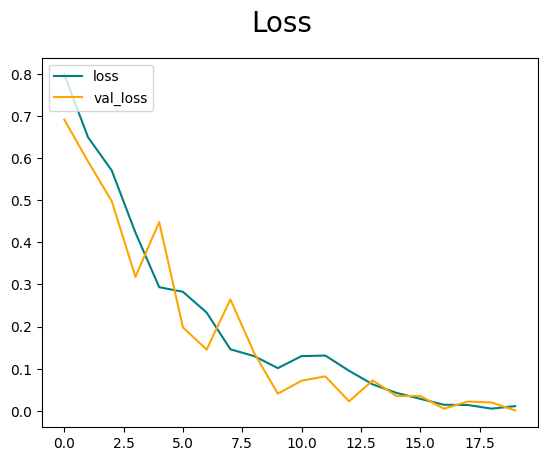

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

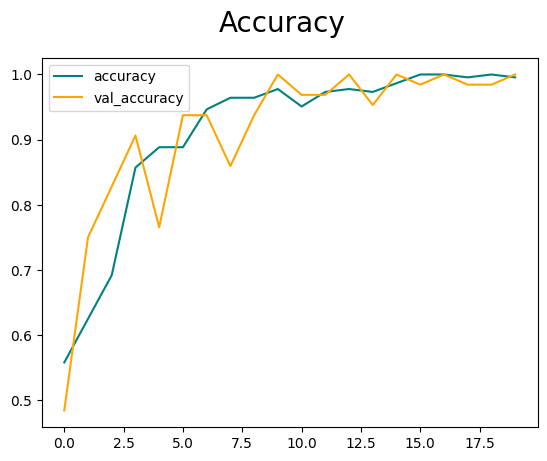

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 199ms/step


In [31]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [32]:
import cv2

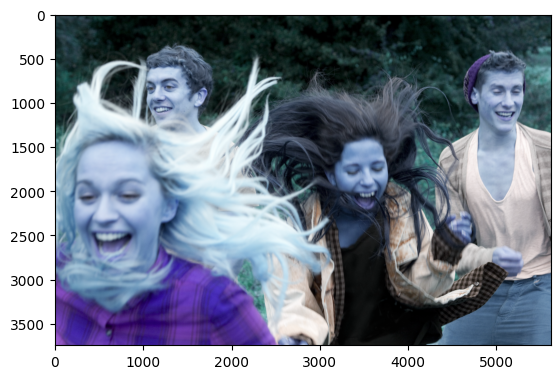

In [33]:
img = cv2.imread('happy_people.jpg')
plt.imshow(img.astype(int))
plt.show()

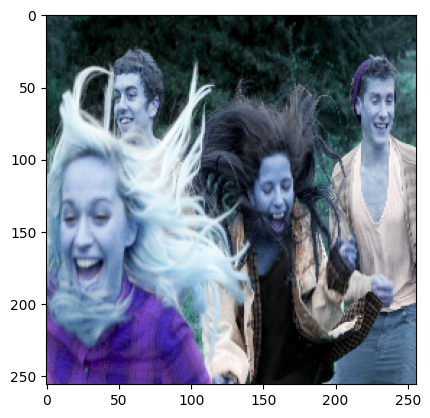

In [34]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 90ms/step


In [36]:
yhat

array([[0.00595233]], dtype=float32)

In [37]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [38]:
from tensorflow.keras.models import load_model

In [39]:
model.save('models/imageclassifier.h5py')

INFO:tensorflow:Assets written to: models/imageclassifier.h5py\assets


INFO:tensorflow:Assets written to: models/imageclassifier.h5py\assets


In [40]:
new_model = load_model('models/imageclassifier.h5py')

In [41]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 124ms/step


array([[0.00595233]], dtype=float32)

# ThankYou